In [1]:
import pandas as pd
path = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(path)

In [2]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [3]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_MT']
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)
provas.append('NU_NOTA_TOTAL')

In [5]:
dados_sem_nota_zero = dados[dados['NU_NOTA_TOTAL'] != 0]

In [6]:
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
provas_entrada = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
prova_saida = 'NU_NOTA_MT'

x = dados_sem_nota_zero[provas_entrada]
y = dados_sem_nota_zero[prova_saida]

In [9]:
x.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,435.6,512.3,488.6,420.0
2,423.2,499.1,441.0,560.0
3,426.2,578.1,551.5,500.0
4,516.5,571.3,511.2,780.0
5,559.6,618.7,607.5,900.0


In [10]:
y.head()

0    432.4
2    427.2
3    499.9
4    424.5
5    615.6
Name: NU_NOTA_MT, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
SEED = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.15, random_state=SEED)

In [13]:
dados_sem_nota_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92537 entries, 0 to 127379
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       92537 non-null  float64
 1   NU_NOTA_CH       92537 non-null  float64
 2   NU_NOTA_LC       92537 non-null  float64
 3   NU_NOTA_REDACAO  92537 non-null  float64
 4   NU_NOTA_MT       92537 non-null  float64
 5   NU_NOTA_TOTAL    92537 non-null  float64
dtypes: float64(6)
memory usage: 4.9 MB


In [14]:
x_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
32734,412.8,532.3,502.3,640.0
93276,471.8,488.8,492.4,720.0
77992,490.7,605.7,610.9,860.0
112932,516.0,585.4,579.5,700.0
114448,459.7,483.6,561.5,620.0


In [15]:
y_treino.shape

(78656,)

In [16]:
from sklearn.svm import LinearSVR

In [17]:
modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino,y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [18]:
predicoes_matematica = modelo.predict(x_teste)

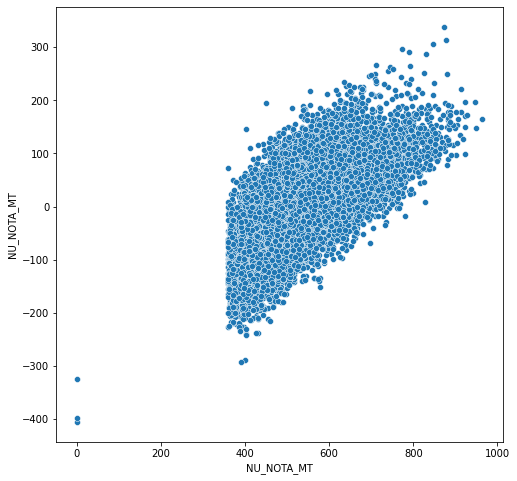

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)


In [20]:
resultados = pd.DataFrame()
resultados['Real'] = y_teste
resultados['Previsao'] = predicoes_matematica
resultados['Diferenca'] = resultados['Real'] - resultados['Previsao']
resultados['Quadrado_Diferenca'] = (resultados['Real'] - resultados['Previsao'])**2

In [21]:
resultados

,Real,Previsao,Diferenca,Quadrado_Diferenca
114991,459.7,542.299834,-82.599834,6822.732595
104685,617.2,621.872075,-4.672075,21.828284
91028,520.0,497.168292,22.831708,521.286869
115802,703.8,575.761957,128.038043,16393.740375
93303,627.1,571.130069,55.969931,3132.633167
...,...,...,...,...
3560,371.1,536.946727,-165.846727,27505.136862
116118,636.2,450.970907,185.229093,34309.816775
47451,398.3,496.126657,-97.826657,9570.054913
101436,395.4,409.587622,-14.187622,201.288610


In [22]:
resultados['Quadrado_Diferenca'].mean()**(1/2)

78.23691774261246

In [23]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino,y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

12228.381784891912

### Desafio 01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula.

In [29]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
predicoes = regressor.predict(x_teste)

### Desafio 02: Ler a documentação do dummy e alterar o método de regressão.

In [36]:
modelo_dummy = DummyRegressor(strategy='median')
modelo_dummy.fit(x_treino,y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mse = mean_squared_error(y_teste, dummy_predicoes)
mae = mean_absolute_error(y_teste, dummy_predicoes)
rmse = mse**(1/2)
scores = pd.Series(data={'MSE':mse, 'RMSE': rmse, 'MAE':mae})
scores

MSE     12736.635629
RMSE      112.856704
MAE        89.344773
dtype: float64

### Desafio 03: Buscar outra métrica para avaliar modelos de regressão.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_teste, predicoes)
mae = mean_absolute_error(y_teste, predicoes)
rmse = mse**(1/2)
scores = pd.Series(data={'MSE':mse, 'RMSE': rmse, 'MAE':mae})
scores

MSE     5963.615506
RMSE      77.224449
MAE       62.302981
dtype: float64